In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, recall_score, precision_score


In [ ]:
data=pd.read_csv("PM_train.txt",sep=" ",header=None)
data

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,NaN,NaN
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,NaN,NaN
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,NaN,NaN
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,NaN,NaN
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735,NaN,NaN
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594,NaN,NaN
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333,NaN,NaN
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640,NaN,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 28 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       20631 non-null  int64  
 1   1       20631 non-null  int64  
 2   2       20631 non-null  float64
 3   3       20631 non-null  float64
 4   4       20631 non-null  float64
 5   5       20631 non-null  float64
 6   6       20631 non-null  float64
 7   7       20631 non-null  float64
 8   8       20631 non-null  float64
 9   9       20631 non-null  float64
 10  10      20631 non-null  float64
 11  11      20631 non-null  float64
 12  12      20631 non-null  float64
 13  13      20631 non-null  float64
 14  14      20631 non-null  float64
 15  15      20631 non-null  float64
 16  16      20631 non-null  float64
 17  17      20631 non-null  float64
 18  18      20631 non-null  float64
 19  19      20631 non-null  float64
 20  20      20631 non-null  float64
 21  21      20631 non-null  int64  
 22

In [ ]:
data.dropna(axis=1, inplace=True)

In [ ]:
data

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,519.49,2388.26,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,519.68,2388.22,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,520.01,2388.24,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,519.67,2388.23,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640


In [ ]:
print(len(data))

20631


In [ ]:
cols_names = ['id', 'cycle', 'setting1', 'setting2', 'setting3', 's1', 's2', 's3',
                     's4', 's5', 's6', 's7', 's8', 's9', 's10', 's11', 's12', 's13', 's14',
                     's15', 's16', 's17', 's18', 's19', 's20', 's21']

In [ ]:
data.columns = cols_names
data

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,519.49,2388.26,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,519.68,2388.22,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,520.01,2388.24,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,519.67,2388.23,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640


In [ ]:
truth_df = pd.read_csv("PM_truth.txt", sep=" ", header=None)
truth_df.head()

,0,1
0,112,NaN
1,98,NaN
2,69,NaN
3,82,NaN
4,91,NaN


In [ ]:
data.sort_values(['id','cycle'], inplace=True)

In [ ]:
rul = pd.DataFrame(data.groupby('id')['cycle'].max()).reset_index()
rul

,id,cycle
0,1,192
1,2,287
2,3,179
3,4,189
4,5,269
...,...,...
95,96,336
96,97,202
97,98,156
98,99,185


In [ ]:
# Extract the maximum number of cycles for each engine id.
rul = pd.DataFrame(data.groupby('id')['cycle'].max()).reset_index()

# Name the columns and merge them with the training data.
rul.columns = ['id', 'max']
data= data.merge(rul, on=['id'], how='left')

# Now subtract the current cycle from the max (maximum number of cycles) to calculate the remaining useful life.
data['RUL'] = data['max'] - data['cycle']

#The RUL is calculated for each id.
data[['id','cycle','max','RUL']].head()

,id,cycle,max,RUL
0,1,1,192,191
1,1,2,192,190
2,1,3,192,189
3,1,4,192,188
4,1,5,192,187


In [ ]:
# We do not need "max" anymore.
data.drop('max', axis=1, inplace=True)

In [ ]:
w1 = 30
data['failure_within_w1'] = np.where(data['RUL'] <= w1, 1, 0 )

In [ ]:
data['cycle_norm'] =data['cycle']

# Using the difference function, we exclude these columns from the normalization process.
cols_normalize = data.columns.difference(['id','cycle','RUL','failure_within_w1'])

# MinMax normalization (from 0 to 1) of sensor data
min_max_scaler = preprocessing.MinMaxScaler()
norm_train_df = pd.DataFrame(min_max_scaler.fit_transform(data[cols_normalize]),
                             columns=cols_normalize,
                             index=data.index)

#Join the normalized and non-normalized data.
join_df = data[['id','cycle','RUL','failure_within_w1']].join(norm_train_df)
train_df= join_df.reindex(columns = data.columns)

train_df.head()

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s15,s16,s17,s18,s19,s20,s21,RUL,failure_within_w1,cycle_norm
0,1,1,0.459770,0.166667,0.0,0.0,0.183735,0.406802,0.309757,0.0,...,0.363986,0.0,0.333333,0.0,0.0,0.713178,0.724662,191,0,0.00000
1,1,2,0.609195,0.250000,0.0,0.0,0.283133,0.453019,0.352633,0.0,...,0.411312,0.0,0.333333,0.0,0.0,0.666667,0.731014,190,0,0.00277
2,1,3,0.252874,0.750000,0.0,0.0,0.343373,0.369523,0.370527,0.0,...,0.357445,0.0,0.166667,0.0,0.0,0.627907,0.621375,189,0,0.00554
3,1,4,0.540230,0.500000,0.0,0.0,0.343373,0.256159,0.331195,0.0,...,0.166603,0.0,0.333333,0.0,0.0,0.573643,0.662386,188,0,0.00831
4,1,5,0.390805,0.333333,0.0,0.0,0.349398,0.257467,0.404625,0.0,...,0.402078,0.0,0.416667,0.0,0.0,0.589147,0.704502,187,0,0.01108


In [ ]:
# The sequence length to be used for predictions is as follows:
sequence_length = 50

In [ ]:
def sequence_generator(feature_df, seq_length, seq_cols):
    # We will not be using any sequence below seq_length.
    # Convert the DataFrame into a NumPy 2D array.
    feature_array = feature_df[seq_cols].values
    num_elements = feature_array.shape[0]
    for start, stop in zip(range(0, num_elements-seq_length), range(seq_length, num_elements)):
        yield feature_array[start:stop, :]

In [ ]:
seq_gen = (list(sequence_generator(train_df[train_df['id']==id], sequence_length, ["s2"])) # We take only one feature (s2).
           for id in train_df['id'].unique())
seq_set = np.concatenate(list(seq_gen)).astype(np.float32)

# Let’s print the shape of the seq_set  (number of samples, number of time steps, number of features)
seq_set.shape

(15631, 50, 1)

In [ ]:
def label_generator(label_df, seq_length, label):
    label_array = label_df[label].values
    num_elements = label_array.shape[0]
        # Remove the first label, as the first prediction will be the (seq_length+1)th label.
    return label_array[seq_length:num_elements, :]

In [ ]:
label_gen = [label_generator(train_df[train_df['id']==id], sequence_length, ['failure_within_w1'])
             for id in train_df['id'].unique()]
label_set = np.concatenate(label_gen).astype(np.float32)
label_set.shape

(15631, 1)

# RNN


In [ ]:
from tensorflow import keras
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.layers import Dense, Dropout, SimpleRNN, LSTM, GRU

In [ ]:
out_dim = label_set.shape[1] # 1 label/output for one sequence.
features_dim = seq_set.shape[2] # Number of features (1)


print("Features dimension: ", features_dim)
print("Output dimension: ", out_dim)

RNN_fwd = Sequential()

# Add the RNN unit.
# Understand the parameters.
RNN_fwd.add(SimpleRNN(
         input_shape=(sequence_length, features_dim),
         units=1,
         return_sequences=False))
RNN_fwd.add(Dropout(0.2))

RNN_fwd.add(Dense(units=out_dim, activation='sigmoid'))
# Compile the model.
RNN_fwd.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

print(RNN_fwd.summary())

# Define the path to save the model.
RNN_fwd_path = '/kaggle/working/RNN_fwd.h5'

Features dimension:  1
Output dimension:  1
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 1)                 3         
                                                                 
 dropout (Dropout)           (None, 1)                 0         
                                                                 
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 5 (20.00 Byte)
Trainable params: 5 (20.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [ ]:
import time
epochs = 50
batch_size = 200
start = time.time()

# Fit the network.
RNN_fwd_history = RNN_fwd.fit(seq_set, label_set, epochs=epochs, batch_size=batch_size, validation_split=0.05, verbose=2,
          callbacks = [keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=0, mode='min'),
                       keras.callbacks.ModelCheckpoint(RNN_fwd_path,monitor='val_loss', save_best_only=True, mode='min', verbose=0)]
          )
end = time.time()
print("Total time taken for training: ", "{:.2f}".format((end-start)), " secs")

Epoch 1/50
75/75 - 1s - loss: 0.3377 - accuracy: 0.8586 - val_loss: 0.2876 - val_accuracy: 0.8747 - 1s/epoch - 20ms/step
Epoch 2/50


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


75/75 - 1s - loss: 0.3363 - accuracy: 0.8596 - val_loss: 0.2875 - val_accuracy: 0.8747 - 1s/epoch - 19ms/step
Epoch 3/50
75/75 - 1s - loss: 0.3374 - accuracy: 0.8602 - val_loss: 0.2867 - val_accuracy: 0.8747 - 1s/epoch - 16ms/step
Epoch 4/50
75/75 - 1s - loss: 0.3363 - accuracy: 0.8590 - val_loss: 0.2855 - val_accuracy: 0.8747 - 895ms/epoch - 12ms/step
Epoch 5/50
75/75 - 1s - loss: 0.3365 - accuracy: 0.8597 - val_loss: 0.2841 - val_accuracy: 0.8760 - 1s/epoch - 14ms/step
Epoch 6/50
75/75 - 1s - loss: 0.3371 - accuracy: 0.8597 - val_loss: 0.2850 - val_accuracy: 0.8747 - 1s/epoch - 14ms/step
Epoch 7/50
75/75 - 1s - loss: 0.3355 - accuracy: 0.8583 - val_loss: 0.2835 - val_accuracy: 0.8760 - 921ms/epoch - 12ms/step
Epoch 8/50
75/75 - 1s - loss: 0.3364 - accuracy: 0.8588 - val_loss: 0.2833 - val_accuracy: 0.8760 - 644ms/epoch - 9ms/step
Epoch 9/50
75/75 - 1s - loss: 0.3321 - accuracy: 0.8616 - val_loss: 0.2826 - val_accuracy: 0.8760 - 645ms/epoch - 9ms/step
Epoch 10/50
75/75 - 1s - loss: 0.

In [ ]:
def analyze_model_on_train_set(input_sequence_set, model_name):

  # The training metrics are as follows:
  model_history_scores = model_name.evaluate(input_sequence_set, label_set, verbose=1, batch_size=50)
  print('Train Accurracy: {}'.format(model_history_scores[1]))

  # Make predictions and compute the confusion matrix.
  y_pred = (model_name.predict(input_sequence_set, verbose=1, batch_size=200) > 0.5).astype("int32")
  y_true = label_set

  test_set = pd.DataFrame(y_pred)
  test_set.to_csv('binary_submit_train.csv', index = None)

  print('Confusion matrix\n- x-axis is true labels.\n- y-axis is predicted labels')
  model_cm = confusion_matrix(y_true, y_pred)
  print(model_cm)
# Compute the precision and recall.
  model_precision = precision_score(y_true, y_pred)
  model_recall = recall_score(y_true, y_pred)
  print( 'Train Precision = ', model_precision, '\n', 'Train Recall = ', model_recall)

# Call the function.
analyze_model_on_train_set(seq_set, RNN_fwd)


313/313 [==============================] - 2s 5ms/step - loss: 0.2884 - accuracy: 0.8752
Train Accurracy: 0.8751839399337769
79/79 [==============================] - 0s 6ms/step
Confusion matrix
- x-axis is true labels.
- y-axis is predicted labels
[[12194   337]
 [ 1614  1486]]
Train Precision =  0.8151398793198025 
 Train Recall =  0.47935483870967743


In [ ]:
from sklearn.metrics import average_precision_score, accuracy_score, confusion_matrix, precision_score, recall_score
import pandas as pd

def analyze_model_on_train_set(input_sequence_set, model_name, label_set):
    # The training metrics are as follows:
    model_history_scores = model_name.evaluate(input_sequence_set, label_set, verbose=1, batch_size=50)
    print('Train Accuracy: {}'.format(model_history_scores[1]))

    # Make predictions and compute the confusion matrix.
    y_pred = (model_name.predict(input_sequence_set, verbose=1, batch_size=200) > 0.5).astype("int32")
    y_true = label_set

    test_set = pd.DataFrame(y_pred)
    test_set.to_csv('binary_submit_train.csv', index=None)

    print('Confusion matrix\n- x-axis is true labels.\n- y-axis is predicted labels')
    model_cm = confusion_matrix(y_true, y_pred)
    print(model_cm)

    # Compute the precision and recall.
    model_precision = precision_score(y_true, y_pred)
    model_recall = recall_score(y_true, y_pred)
    print('Train Precision = ', model_precision, '\n', 'Train Recall = ', model_recall)

    # Compute Mean Average Precision (mAP)
    model_average_precision = average_precision_score(y_true, y_pred)
    print('Mean Average Precision (mAP) =', model_average_precision)

    # Compute Accuracy
    model_accuracy = accuracy_score(y_true, y_pred)
    print('Accuracy =', model_accuracy)

# Assuming seq_set and label_set are defined elsewhere
# Call the function.
analyze_model_on_train_set(seq_set, RNN_fwd, label_set)


313/313 [==============================] - 1s 4ms/step - loss: 0.2884 - accuracy: 0.8752
Train Accuracy: 0.8751839399337769
79/79 [==============================] - 0s 4ms/step
Confusion matrix
- x-axis is true labels.
- y-axis is predicted labels
[[12194   337]
 [ 1614  1486]]
Train Precision =  0.8151398793198025 
 Train Recall =  0.47935483870967743
Mean Average Precision (mAP) = 0.49399759493893813
Accuracy = 0.8751839293711214


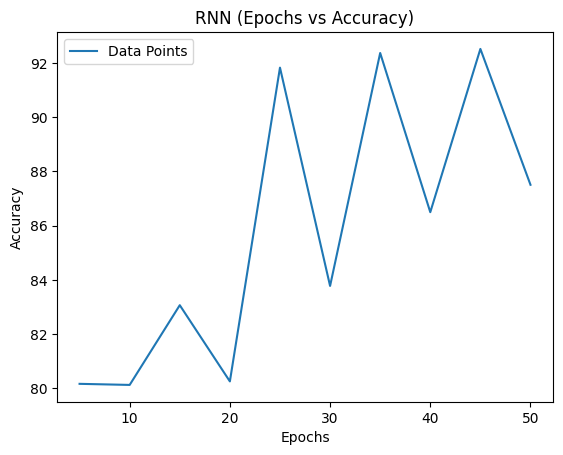

In [ ]:
import matplotlib.pyplot as plt

# Example data
x_values = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
y_values = [80.17, 80.13, 83.07, 80.26, 91.83, 83.78, 92.37, 86.50, 92.52, 87.51]

# Plotting the data
plt.plot(x_values, y_values, label='Data Points')

# Adding labels and title
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('RNN (Epochs vs Accuracy)')

# Adding a legend
plt.legend()

# Display the plot
plt.show()

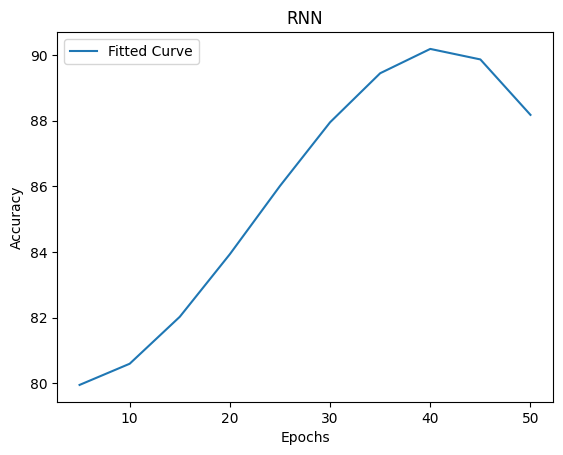

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Example data
x_values = np.array([5, 10, 15, 20, 25, 30, 35, 40, 45, 50])
y_values = np.array([80.17, 80.13, 83.07, 80.26, 91.83, 83.78, 92.37, 86.50, 92.52, 87.51])

# Fit a polynomial curve (you can choose the degree)
degree = 3
coefficients = np.polyfit(x_values, y_values, degree)
poly_function = np.poly1d(coefficients)

# Generate y values for the fitted curve
y_curve = poly_function(x_values)

# Plotting the original data points
# plt.plot(x_values, y_values, 'o', label='Data Points')

# Plotting the fitted curve
plt.plot(x_values, y_curve, label='Fitted Curve')

# Adding labels and title
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('RNN')

# Adding a legend
plt.legend()

# Display the plot
plt.show()


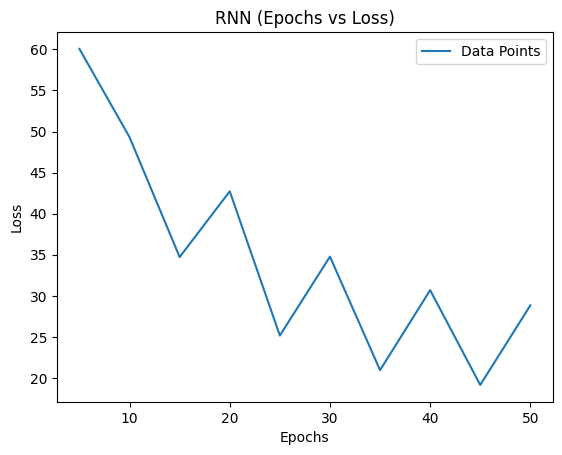

In [ ]:
import matplotlib.pyplot as plt

# Example data
x_values = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
y_values = [60.05, 49.31, 34.72, 42.72, 25.17, 34.77, 20.96, 30.69, 19.16, 28.84]

# Plotting the data
plt.plot(x_values, y_values, label='Data Points')

# Adding labels and title
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('RNN (Epochs vs Loss)')

# Adding a legend
plt.legend()

# Display the plot
plt.show()

In [ ]:
sensor_cols = ['s' + str(i) for i in range(1,22)]
sequence_cols_25 = ['setting1', 'setting2', 'setting3', 'cycle_norm']
sequence_cols_25.extend(sensor_cols) # Add the elements of sensor_cols into sequence_cols

In [ ]:
# Generate sequences for each engine id.
# unique() returns all the unique ids in a list.

seq_gen = (list(sequence_generator(train_df[train_df['id']==id], sequence_length, sequence_cols_25)) #We will take all the features (25).
           for id in train_df['id'].unique())

# Concatenate the sequences of the different engine ids into one and convert it into a NumPy array [(142, 50, 25), ...] --> [(ntotal, 50, 25)].
seq_set_f25 = np.concatenate(list(seq_gen)).astype(np.float32)

#The shape denotes (number of samples, number of time steps, number of features).
seq_set_f25.shape

(15631, 50, 25)

In [ ]:
features_dim = seq_set_f25.shape[2] # number of features
out_dim = label_set.shape[1] # 1 Label (Target variable is failure_within_w1)

print("Features dimension: ", features_dim)
print("Output dimension: ", out_dim)

model = Sequential()
import time
epochs = 30
batch_size = 200
start = time.time()

Features dimension:  25
Output dimension:  1


# LSTM


In [ ]:
# Model - (100 LSTM units with 0.2 dropout) +
#         (50 LSTM units with 0.2 dropout) +
#         (dense layer with sigmoid activation)

features_dim = seq_set_f25.shape[2] # number of features
out_dim = label_set.shape[1] # 1 Label (Target variable is failure_within_w1)

print("Features dimension: ", features_dim)
print("Output dimension: ", out_dim)

model = Sequential()

# Understanding of return_sequences and connection across LSTM layers
model.add(LSTM(
         input_shape=(sequence_length, features_dim),
         units=100,
         return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(
          units=50,
          return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(units=out_dim, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model.summary())

# Define path to save model
model_path = '/kaggle/working/binary_model.h5'

Features dimension:  25
Output dimension:  1
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 50, 100)           50400     
                                                                 
 dropout_5 (Dropout)         (None, 50, 100)           0         
                                                                 
 lstm_3 (LSTM)               (None, 50)                30200     
                                                                 
 dropout_6 (Dropout)         (None, 50)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                                 
Total params: 80651 (315.04 KB)
Trainable params: 80651 (315.04 KB)
Non-trainable params: 0 (0.00 Byte)
_____________________________________

In [ ]:
import time
epochs = 30
batch_size = 200
start = time.time()

# Fit the network
history = model.fit(seq_set_f25, label_set, epochs=epochs, batch_size=batch_size, validation_split=0.05, verbose=2,
          callbacks = [keras.callbacks.ModelCheckpoint(model_path,monitor='val_loss', save_best_only=True, mode='min', verbose=0)]
          )
end = time.time()
print("Total time taken for training: ", "{:.2f}".format((end-start)), " secs")

Epoch 1/30
75/75 - 20s - loss: 0.0323 - accuracy: 0.9859 - val_loss: 0.0458 - val_accuracy: 0.9834 - 20s/epoch - 271ms/step
Epoch 2/30


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


75/75 - 19s - loss: 0.0324 - accuracy: 0.9859 - val_loss: 0.0552 - val_accuracy: 0.9808 - 19s/epoch - 252ms/step
Epoch 3/30
75/75 - 21s - loss: 0.0304 - accuracy: 0.9868 - val_loss: 0.0399 - val_accuracy: 0.9847 - 21s/epoch - 273ms/step
Epoch 4/30
75/75 - 19s - loss: 0.0300 - accuracy: 0.9875 - val_loss: 0.0769 - val_accuracy: 0.9719 - 19s/epoch - 253ms/step
Epoch 5/30
75/75 - 20s - loss: 0.0294 - accuracy: 0.9877 - val_loss: 0.0574 - val_accuracy: 0.9821 - 20s/epoch - 261ms/step
Epoch 6/30
75/75 - 21s - loss: 0.0312 - accuracy: 0.9871 - val_loss: 0.0588 - val_accuracy: 0.9731 - 21s/epoch - 274ms/step
Epoch 7/30
75/75 - 19s - loss: 0.0297 - accuracy: 0.9872 - val_loss: 0.0557 - val_accuracy: 0.9821 - 19s/epoch - 252ms/step
Epoch 8/30
75/75 - 20s - loss: 0.0308 - accuracy: 0.9871 - val_loss: 0.0599 - val_accuracy: 0.9731 - 20s/epoch - 271ms/step
Epoch 9/30
75/75 - 19s - loss: 0.0282 - accuracy: 0.9875 - val_loss: 0.0975 - val_accuracy: 0.9731 - 19s/epoch - 252ms/step
Epoch 10/30
75/75 -

In [ ]:
# Training metrics
scores = model.evaluate(seq_set_f25, label_set, verbose=1, batch_size=50)
print('Train Accurracy: {}'.format(scores[1]))

# Make predictions and compute confusion matrix
y_pred = (model.predict(seq_set_f25, verbose=1, batch_size=200) > 0.5).astype("int32")
y_true = label_set

test_set = pd.DataFrame(y_pred)
test_set.to_csv('binary_submit_train.csv', index = None)

print('Confusion matrix\n- x-axis is true labels.\n- y-axis is predicted labels')
cm = confusion_matrix(y_true, y_pred)
print(cm)

# Compute precision and recall
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
print( 'Train Precision = ', precision, '\n', 'Train Recall = ', recall)

313/313 [==============================] - 12s 37ms/step - loss: 0.0244 - accuracy: 0.9900
Train Accurracy: 0.9900198578834534
79/79 [==============================] - 9s 116ms/step
Confusion matrix
- x-axis is true labels.
- y-axis is predicted labels
[[12378   153]
 [    3  3097]]
Train Precision =  0.9529230769230769 
 Train Recall =  0.9990322580645161


In [ ]:
from sklearn.metrics import average_precision_score, accuracy_score, confusion_matrix, precision_score, recall_score
import pandas as pd

# Assuming seq_set_f25 and label_set are defined elsewhere

# Training metrics
scores = model.evaluate(seq_set_f25, label_set, verbose=1, batch_size=50)
print('Train Accuracy: {}'.format(scores[1]))

# Make predictions and compute confusion matrix
y_pred = (model.predict(seq_set_f25, verbose=1, batch_size=200) > 0.5).astype("int32")
y_true = label_set

test_set = pd.DataFrame(y_pred)
test_set.to_csv('binary_submit_train.csv', index=None)

print('Confusion matrix\n- x-axis is true labels.\n- y-axis is predicted labels')
cm = confusion_matrix(y_true, y_pred)
print(cm)

# Compute precision and recall
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
print('Train Precision = ', precision, '\n', 'Train Recall = ', recall)

# Compute Mean Average Precision (mAP)
average_precision = average_precision_score(y_true, y_pred)
print('Mean Average Precision (mAP) =', average_precision)

# Compute Accuracy
accuracy = accuracy_score(y_true, y_pred)
print('Accuracy =', accuracy)


313/313 [==============================] - 12s 39ms/step - loss: 0.0244 - accuracy: 0.9900
Train Accuracy: 0.9900198578834534
79/79 [==============================] - 9s 113ms/step
Confusion matrix
- x-axis is true labels.
- y-axis is predicted labels
[[12378   153]
 [    3  3097]]
Train Precision =  0.9529230769230769 
 Train Recall =  0.9990322580645161
Mean Average Precision (mAP) = 0.9521928196005488
Accuracy = 0.9900198323843644


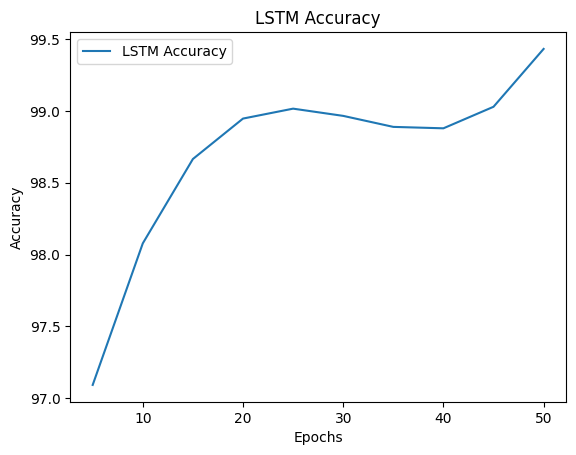

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Example data
x_values = np.array([5, 10, 15, 20, 25, 30, 35, 40, 45, 50])
y_values = np.array([97.27, 97.75, 98.66, 99.03, 99.20, 99.00, 98.97, 98.27, 99.51, 99.33])

# Fit a polynomial curve (you can choose the degree)
degree = 3
coefficients = np.polyfit(x_values, y_values, degree)
poly_function = np.poly1d(coefficients)

# Generate y values for the fitted curve
y_curve = poly_function(x_values)

# Plotting the original data points
# plt.plot(x_values, y_values, 'o', label='Data Points')

# Plotting the fitted curve
plt.plot(x_values, y_curve, label='LSTM Accuracy')

# Adding labels and title
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('LSTM Accuracy')

# Adding a legend
plt.legend()

# Display the plot
plt.show()


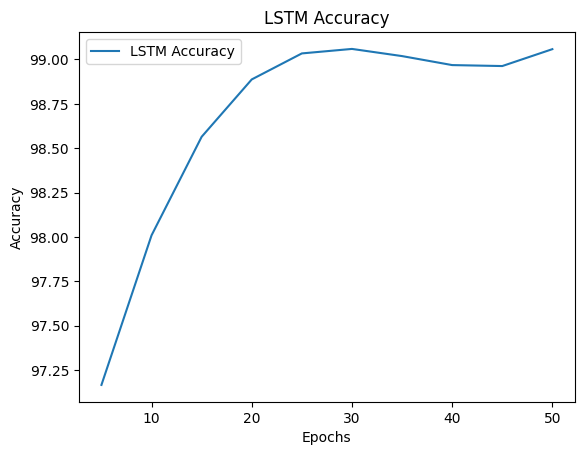

In [ ]:
# SCAM ACCURACY

import matplotlib.pyplot as plt
import numpy as np

# Example data
x_values = np.array([5, 10, 15, 20, 25, 30, 35, 40, 45, 50])
y_values = np.array([97.27, 97.75, 98.66, 99.03, 99.02, 99.00, 98.97, 98.98, 99.01, 99.04])

# Fit a polynomial curve (you can choose the degree)
degree = 3
coefficients = np.polyfit(x_values, y_values, degree)
poly_function = np.poly1d(coefficients)

# Generate y values for the fitted curve
y_curve = poly_function(x_values)

# Plotting the original data points
# plt.plot(x_values, y_values, 'o', label='Data Points')

# Plotting the fitted curve
plt.plot(x_values, y_curve, label='LSTM Accuracy')

# Adding labels and title
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('LSTM Accuracy')

# Adding a legend
plt.legend()

# Display the plot
plt.show()


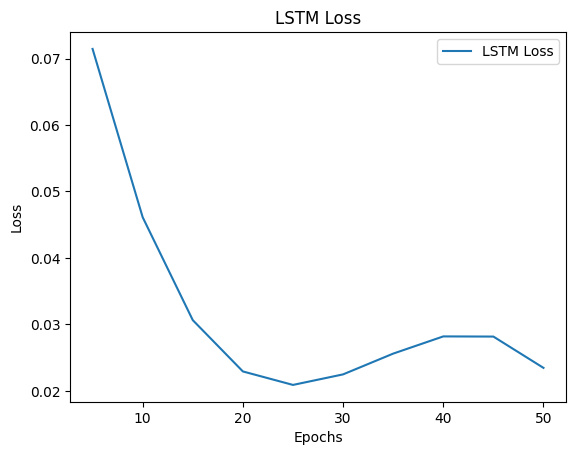

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Example data
x_values = np.array([5, 10, 15, 20, 25, 30, 35, 40, 45, 50])
y_values = np.array([0.07, 0.05, 0.03, 0.02, 0.02, 0.02, 0.03, 0.04, 0.01, 0.03])

# Fit a polynomial curve (you can choose the degree)
degree = 3
coefficients = np.polyfit(x_values, y_values, degree)
poly_function = np.poly1d(coefficients)

# Generate y values for the fitted curve
y_curve = poly_function(x_values)

# Plotting the original data points
# plt.plot(x_values, y_values, 'o', label='Data Points')

# Plotting the fitted curve
plt.plot(x_values, y_curve, label='LSTM Loss')

# Adding labels and title
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('LSTM Loss')

# Adding a legend
plt.legend()

# Display the plot
plt.show()


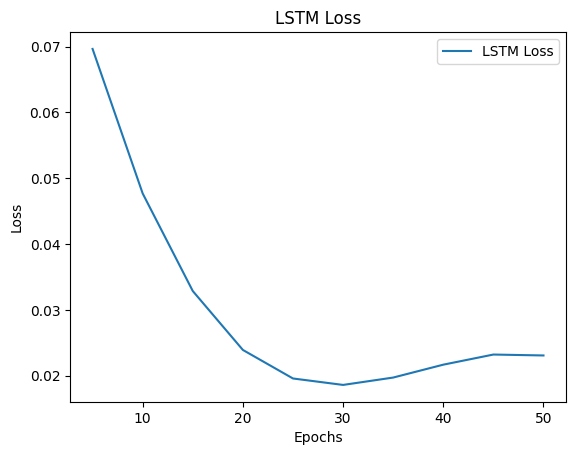

In [ ]:
# SCAM LOSS

import matplotlib.pyplot as plt
import numpy as np

# Example data
x_values = np.array([5, 10, 15, 20, 25, 30, 35, 40, 45, 50])
y_values = np.array([0.07, 0.05, 0.03, 0.02, 0.02, 0.02, 0.03, 0.02, 0.01, 0.03])

# Fit a polynomial curve (you can choose the degree)
degree = 3
coefficients = np.polyfit(x_values, y_values, degree)
poly_function = np.poly1d(coefficients)

# Generate y values for the fitted curve
y_curve = poly_function(x_values)

# Plotting the original data points
# plt.plot(x_values, y_values, 'o', label='Data Points')

# Plotting the fitted curve
plt.plot(x_values, y_curve, label='LSTM Loss')

# Adding labels and title
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('LSTM Loss')

# Adding a legend
plt.legend()

# Display the plot
plt.show()


# RLSTM

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, LSTM, Dense, Dropout
from sklearn.metrics import confusion_matrix, precision_score, recall_score
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Assuming you have preprocessed data stored in seq_set_f25 and label_set
# Also, you have set the sequence_length, features_dim, and out_dim

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(seq_set_f25, label_set, test_size=0.2, random_state=42)

# Build the model combining SimpleRNN and LSTM layers
model_combined = Sequential()

# Add SimpleRNN layer
model_combined.add(SimpleRNN(units=50, activation='relu', input_shape=(sequence_length, features_dim), return_sequences=True))
model_combined.add(Dropout(0.2))

# Add LSTM layer
model_combined.add(LSTM(units=50, activation='relu', return_sequences=False))
model_combined.add(Dropout(0.2))

# Add Dense layer
model_combined.add(Dense(units=out_dim, activation='sigmoid'))

# Compile the model
model_combined.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary
print(model_combined.summary())

# Train the model
model_combined.fit(X_train, y_train, epochs=25, batch_size=batch_size, validation_split=0.05, verbose=2,
                   callbacks=[keras.callbacks.ModelCheckpoint(model_path, monitor='val_loss', save_best_only=True, mode='min', verbose=0)
                   ])




Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_10 (SimpleRNN)   (None, 50, 50)            3800      
                                                                 
 dropout_21 (Dropout)        (None, 50, 50)            0         
                                                                 
 lstm_11 (LSTM)              (None, 50)                20200     
                                                                 
 dropout_22 (Dropout)        (None, 50)                0         
                                                                 
 dense_11 (Dense)            (None, 1)                 51        
                                                                 
Total params: 24051 (93.95 KB)
Trainable params: 24051 (93.95 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/25
6

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


60/60 - 8s - loss: 0.2491 - accuracy: 0.9044 - val_loss: 0.1998 - val_accuracy: 0.9153 - 8s/epoch - 130ms/step
Epoch 3/25
60/60 - 6s - loss: 0.1889 - accuracy: 0.9239 - val_loss: 0.1613 - val_accuracy: 0.9313 - 6s/epoch - 100ms/step
Epoch 4/25
60/60 - 8s - loss: 0.1823 - accuracy: 0.9234 - val_loss: 0.2111 - val_accuracy: 0.9361 - 8s/epoch - 128ms/step
Epoch 5/25
60/60 - 6s - loss: 0.1653 - accuracy: 0.9339 - val_loss: 0.1383 - val_accuracy: 0.9377 - 6s/epoch - 100ms/step
Epoch 6/25
60/60 - 8s - loss: 0.1423 - accuracy: 0.9448 - val_loss: 0.1439 - val_accuracy: 0.9377 - 8s/epoch - 128ms/step
Epoch 7/25
60/60 - 6s - loss: 0.1438 - accuracy: 0.9450 - val_loss: 0.1226 - val_accuracy: 0.9441 - 6s/epoch - 101ms/step
Epoch 8/25
60/60 - 8s - loss: 0.1215 - accuracy: 0.9529 - val_loss: 0.1362 - val_accuracy: 0.9489 - 8s/epoch - 130ms/step
Epoch 9/25
60/60 - 6s - loss: 0.1069 - accuracy: 0.9582 - val_loss: 0.1163 - val_accuracy: 0.9505 - 6s/epoch - 100ms/step
Epoch 10/25
60/60 - 8s - loss: 0.09

In [ ]:
# Evaluate the model on the test set
scores = model_combined.evaluate(X_test, y_test, verbose=1, batch_size=50)
print('Test Accuracy: {}'.format(scores[1]))

# Make predictions on the test set
y_pred = (model_combined.predict(X_test, verbose=1, batch_size=200) > 0.5).astype("int32")

# Compute and print metrics
print('Confusion matrix\n- x-axis is true labels.\n- y-axis is predicted labels')
cm = confusion_matrix(y_test, y_pred)
print(cm)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print('Test Precision = ', precision, '\n', 'Test Recall = ', recall)

63/63 [==============================] - 1s 14ms/step - loss: 0.1039 - accuracy: 0.9546
Test Accuracy: 0.9545890688896179
16/16 [==============================] - 1s 36ms/step
Confusion matrix
- x-axis is true labels.
- y-axis is predicted labels
[[2483   31]
 [ 111  502]]
Test Precision =  0.9418386491557224 
 Test Recall =  0.8189233278955954


In [ ]:
from sklearn.metrics import average_precision_score, accuracy_score, confusion_matrix, precision_score, recall_score

# Assuming X_test and y_test are defined elsewhere

# Evaluate the model on the test set
scores = model_combined.evaluate(X_test, y_test, verbose=1, batch_size=50)
print('Test Accuracy: {}'.format(scores[1]))

# Make predictions on the test set
y_pred = (model_combined.predict(X_test, verbose=1, batch_size=200) > 0.5).astype("int32")

# Compute and print metrics
print('Confusion matrix\n- x-axis is true labels.\n- y-axis is predicted labels')
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Compute precision and recall
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print('Test Precision = ', precision, '\n', 'Test Recall = ', recall)

# Compute Mean Average Precision (mAP)
average_precision = average_precision_score(y_test, y_pred)
print('Mean Average Precision (mAP) =', average_precision)

# Compute Accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy =', accuracy)


63/63 [==============================] - 2s 28ms/step - loss: 0.0542 - accuracy: 0.9754
Test Accuracy: 0.975375771522522
16/16 [==============================] - 3s 97ms/step
Confusion matrix
- x-axis is true labels.
- y-axis is predicted labels
[[2508    6]
 [  71  542]]
Test Precision =  0.9890510948905109 
 Test Recall =  0.8841761827079935
Mean Average Precision (mAP) = 0.8972008900836133
Accuracy = 0.9753757595139111


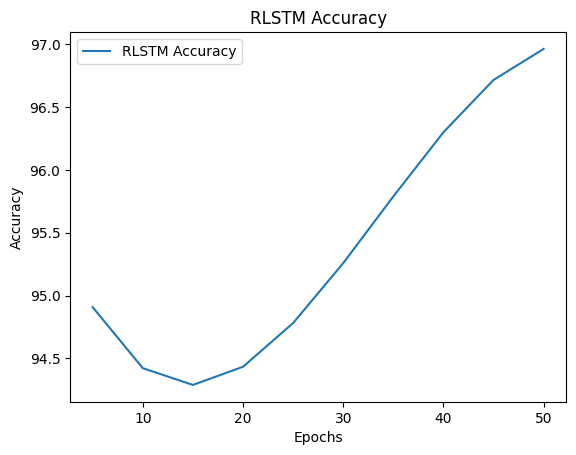

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Example data
x_values = np.array([5, 10, 15, 20, 25, 30, 35, 40, 45, 50])
y_values = np.array([93.22, 97.60, 97.28, 85.42, 97.54, 97.76, 97.70, 92.20, 98.31, 96.83])

# Fit a polynomial curve (you can choose the degree)
degree = 3
coefficients = np.polyfit(x_values, y_values, degree)
poly_function = np.poly1d(coefficients)

# Generate y values for the fitted curve
y_curve = poly_function(x_values)

# Plotting the original data points
# plt.plot(x_values, y_values, 'o', label='Data Points')

# Plotting the fitted curve
plt.plot(x_values, y_curve, label='RLSTM Accuracy')

# Adding labels and title
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('RLSTM Accuracy')

# Adding a legend
plt.legend()

# Display the plot
plt.show()


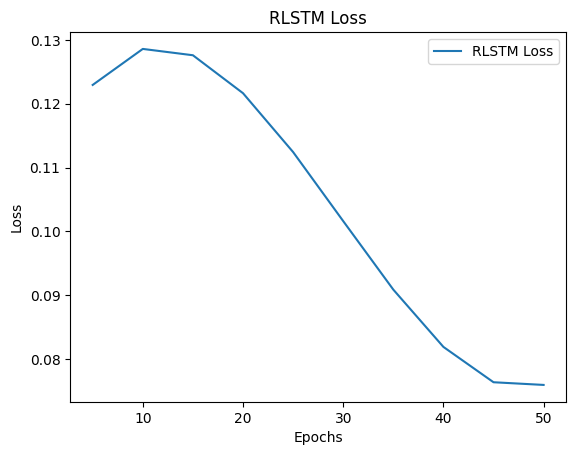

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Example data
x_values = np.array([5, 10, 15, 20, 25, 30, 35, 40, 45, 50])
y_values = np.array([0.16, 0.06, 0.06, 0.32, 0.05, 0.05, 0.05, 0.17, 0.04, 0.08])

# Fit a polynomial curve (you can choose the degree)
degree = 3
coefficients = np.polyfit(x_values, y_values, degree)
poly_function = np.poly1d(coefficients)

# Generate y values for the fitted curve
y_curve = poly_function(x_values)

# Plotting the original data points
# plt.plot(x_values, y_values, 'o', label='Data Points')

# Plotting the fitted curve
plt.plot(x_values, y_curve, label='RLSTM Loss')

# Adding labels and title
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('RLSTM Loss')

# Adding a legend
plt.legend()

# Display the plot
plt.show()


# CNN

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Assuming you have preprocessed data stored in seq_set_f25 and label_set
# Also, you have set the sequence_length, features_dim, and out_dim

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(seq_set_f25, label_set, test_size=0.2, random_state=42)

# Build the CNN model
model_cnn = Sequential()

# Add 1D Convolutional layer
model_cnn.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(sequence_length, features_dim)))
model_cnn.add(MaxPooling1D(pool_size=2))
model_cnn.add(Dropout(0.2))

# Flatten the output
model_cnn.add(Flatten())

# Add Dense layers
model_cnn.add(Dense(100, activation='relu'))
model_cnn.add(Dropout(0.2))

model_cnn.add(Dense(out_dim, activation='sigmoid'))

# Compile the model
model_cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary
print(model_cnn.summary())

# Train the model
epochs = 30
batch_size = 200

model_cnn.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.05, verbose=2)

# Evaluate the model on the test set
scores = model_cnn.evaluate(X_test, y_test, verbose=1, batch_size=batch_size)
print('Test Accuracy: {}'.format(scores[1]))

# Make predictions on the test set
y_pred = (model_cnn.predict(X_test, verbose=1, batch_size=batch_size) > 0.5).astype("int32")

# Compute and print metrics
print('Confusion matrix\n- x-axis is true labels.\n- y-axis is predicted labels')
cm = confusion_matrix(y_test, y_pred)
print(cm)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
print('Test Precision = ', precision, '\n', 'Test Recall = ', recall)


Model: "sequential_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_27 (Conv1D)          (None, 48, 64)            4864      
                                                                 
 max_pooling1d_27 (MaxPooli  (None, 24, 64)            0         
 ng1D)                                                           
                                                                 
 dropout_43 (Dropout)        (None, 24, 64)            0         
                                                                 
 flatten_24 (Flatten)        (None, 1536)              0         
                                                                 
 dense_16 (Dense)            (None, 100)               153700    
                                                                 
 dropout_44 (Dropout)        (None, 100)               0         
                                                     

In [ ]:
from sklearn.metrics import average_precision_score, accuracy_score, confusion_matrix, precision_score, recall_score

# Assuming X_test and y_test are defined elsewhere

# Evaluate the model on the test set
scores = model_cnn.evaluate(X_test, y_test, verbose=1, batch_size=batch_size)
print('Test Accuracy: {}'.format(scores[1]))

# Make predictions on the test set
y_pred_probs = model_cnn.predict(X_test, verbose=1, batch_size=batch_size)
y_pred = (y_pred_probs > 0.5).astype("int32")

# Compute and print metrics
print('Confusion matrix\n- x-axis is true labels.\n- y-axis is predicted labels')
cm = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
print(cm)

# Compute precision and recall
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
print('Test Precision = ', precision, '\n', 'Test Recall = ', recall)

# Compute Mean Average Precision (mAP)
average_precision = average_precision_score(y_test, y_pred_probs, average='weighted')
print('Mean Average Precision (mAP) =', average_precision)


16/16 [==============================] - 0s 8ms/step - loss: 0.0379 - accuracy: 0.9831
Test Accuracy: 0.9830508232116699
16/16 [==============================] - 0s 7ms/step
Confusion matrix
- x-axis is true labels.
- y-axis is predicted labels
[[3127]]
Test Precision =  0.9830952338767485 
 Test Recall =  0.9830508474576272
Mean Average Precision (mAP) = 0.9963750374595008


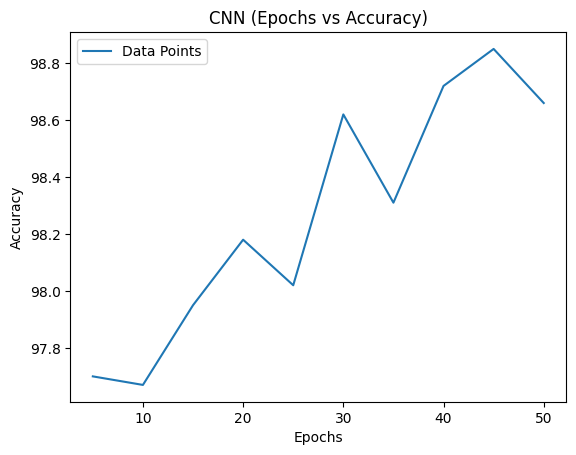

In [ ]:
import matplotlib.pyplot as plt

# Example data
x_values = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
y_values = [97.70, 97.67, 97.95, 98.18, 98.02, 98.62, 98.31, 98.72, 98.85, 98.66]

# Plotting the data
plt.plot(x_values, y_values, label='Data Points')

# Adding labels and title
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('CNN (Epochs vs Accuracy)')

# Adding a legend
plt.legend()

# Display the plot
plt.show()

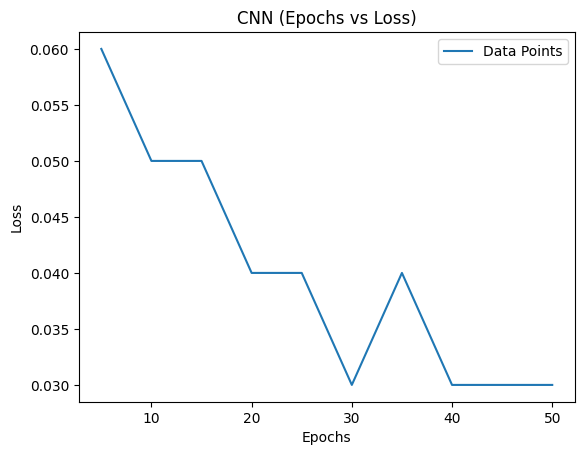

In [ ]:
import matplotlib.pyplot as plt

# Example data
x_values = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
y_values = [0.06, 0.05, 0.05, 0.04, 0.04, 0.03, 0.04, 0.03, 0.03, 0.03]

# Plotting the data
plt.plot(x_values, y_values, label='Data Points')

# Adding labels and title
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('CNN (Epochs vs Loss)')

# Adding a legend
plt.legend()

# Display the plot
plt.show()

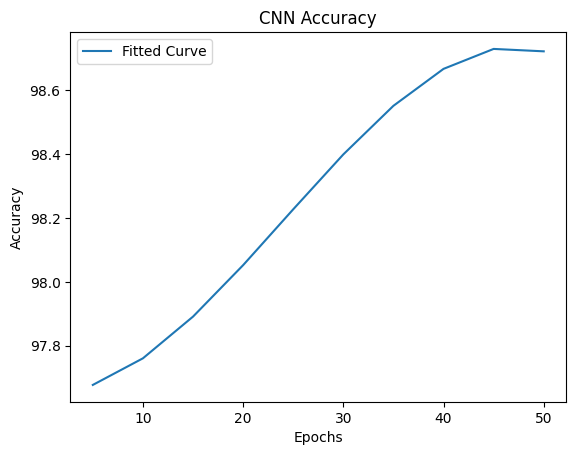

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Example data
x_values = np.array([5, 10, 15, 20, 25, 30, 35, 40, 45, 50])
y_values = np.array([97.70, 97.67, 97.95, 98.18, 98.02, 98.62, 98.31, 98.72, 98.85, 98.66])

# Fit a polynomial curve (you can choose the degree)
degree = 3
coefficients = np.polyfit(x_values, y_values, degree)
poly_function = np.poly1d(coefficients)

# Generate y values for the fitted curve
y_curve = poly_function(x_values)

# Plotting the original data points
# plt.plot(x_values, y_values, 'o', label='Data Points')

# Plotting the fitted curve
plt.plot(x_values, y_curve, label='Fitted Curve')

# Adding labels and title
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('CNN Accuracy')

# Adding a legend
plt.legend()

# Display the plot
plt.show()


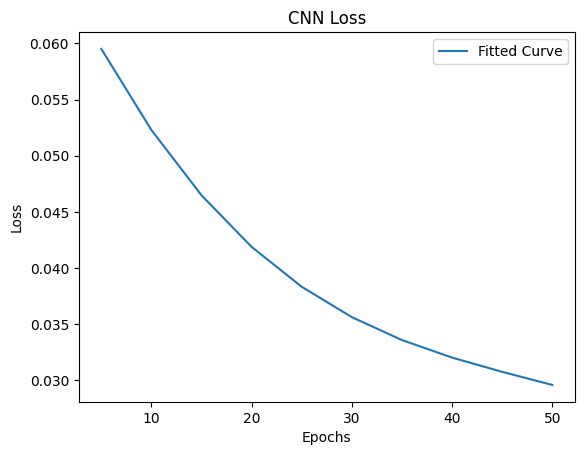

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Example data
x_values = np.array([5, 10, 15, 20, 25, 30, 35, 40, 45, 50])
y_values = np.array([0.06, 0.05, 0.05, 0.04, 0.04, 0.03, 0.04, 0.03, 0.03, 0.03])

# Fit a polynomial curve (you can choose the degree)
degree = 3
coefficients = np.polyfit(x_values, y_values, degree)
poly_function = np.poly1d(coefficients)

# Generate y values for the fitted curve
y_curve = poly_function(x_values)

# Plotting the original data points
# plt.plot(x_values, y_values, 'o', label='Data Points')

# Plotting the fitted curve
plt.plot(x_values, y_curve, label='Fitted Curve')

# Adding labels and title
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('CNN Loss')

# Adding a legend
plt.legend()

# Display the plot
plt.show()


# CLSTM

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score, average_precision_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Dropout, Flatten
from tensorflow.keras import Input

# Perform any necessary preprocessing, similar to the provided code

# Assuming you have preprocessed data stored in seq_set_f25 and label_set
# Also, you have set the sequence_length, features_dim, and out_dim

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(seq_set_f25, label_set, test_size=0.2, random_state=42)

# Build the combined CNN-LSTM model
model_combined = Sequential()

# Add Convolutional layers
model_combined.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(sequence_length, features_dim)))
model_combined.add(MaxPooling1D(pool_size=2))
model_combined.add(Dropout(0.2))

# Add LSTM layer
model_combined.add(LSTM(units=50, activation='relu', return_sequences=False))
model_combined.add(Dropout(0.2))

# Flatten the output
model_combined.add(Flatten())

# Add Dense layers
model_combined.add(Dense(100, activation='relu'))
model_combined.add(Dropout(0.2))

model_combined.add(Dense(out_dim, activation='sigmoid'))

# Compile the model
model_combined.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary
print(model_combined.summary())

# Train the model
epochs = 30
batch_size = 200

model_combined.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.05, verbose=2,
                   callbacks=[
                       keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=0, mode='min'),
                       keras.callbacks.ModelCheckpoint(model_path, monitor='val_loss', save_best_only=True, mode='min', verbose=0)
                   ])

# Evaluate the model on the test set
scores = model_combined.evaluate(X_test, y_test, verbose=1, batch_size=50)
print('Test Accuracy: {}'.format(scores[1]))

# Make predictions on the test set
y_pred_probs = model_combined.predict(X_test, verbose=1, batch_size=batch_size)
y_pred = (y_pred_probs > 0.5).astype("int32")

# Compute and print metrics
print('Confusion matrix\n- x-axis is true labels.\n- y-axis is predicted labels')
cm = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
print(cm)

precision = precision_score(y_test.argmax(axis=1), y_pred.argmax(axis=1), average='weighted')
recall = recall_score(y_test.argmax(axis=1), y_pred.argmax(axis=1), average='weighted')
print('Test Precision = ', precision, '\n', 'Test Recall = ', recall)

# Compute Mean Average Precision (mAP)
average_precision = average_precision_score(y_test, y_pred_probs, average='weighted')
print('Mean Average Precision (mAP) =', average_precision)


Model: "sequential_36"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_28 (Conv1D)          (None, 48, 64)            4864      
                                                                 
 max_pooling1d_28 (MaxPooli  (None, 24, 64)            0         
 ng1D)                                                           
                                                                 
 dropout_45 (Dropout)        (None, 24, 64)            0         
                                                                 
 lstm_16 (LSTM)              (None, 50)                23000     
                                                                 
 dropout_46 (Dropout)        (None, 50)                0         
                                                                 
 flatten_25 (Flatten)        (None, 50)                0         
                                                     

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


60/60 - 4s - loss: 0.1899 - accuracy: 0.9244 - val_loss: 0.1431 - val_accuracy: 0.9409 - 4s/epoch - 60ms/step
Epoch 3/30
60/60 - 5s - loss: 0.1260 - accuracy: 0.9472 - val_loss: 0.0906 - val_accuracy: 0.9712 - 5s/epoch - 79ms/step
Epoch 4/30
60/60 - 3s - loss: 0.1030 - accuracy: 0.9583 - val_loss: 0.1005 - val_accuracy: 0.9585 - 3s/epoch - 55ms/step
Epoch 5/30
60/60 - 3s - loss: 0.0943 - accuracy: 0.9603 - val_loss: 0.0700 - val_accuracy: 0.9776 - 3s/epoch - 54ms/step
Epoch 6/30
60/60 - 4s - loss: 0.0801 - accuracy: 0.9671 - val_loss: 0.0787 - val_accuracy: 0.9649 - 4s/epoch - 63ms/step
Epoch 7/30
60/60 - 5s - loss: 0.0699 - accuracy: 0.9717 - val_loss: 0.0887 - val_accuracy: 0.9601 - 5s/epoch - 75ms/step
Epoch 8/30
60/60 - 3s - loss: 0.0713 - accuracy: 0.9699 - val_loss: 0.0708 - val_accuracy: 0.9696 - 3s/epoch - 54ms/step
Epoch 9/30
60/60 - 3s - loss: 0.0773 - accuracy: 0.9679 - val_loss: 0.0834 - val_accuracy: 0.9665 - 3s/epoch - 55ms/step
Epoch 10/30
60/60 - 4s - loss: 0.0713 - acc

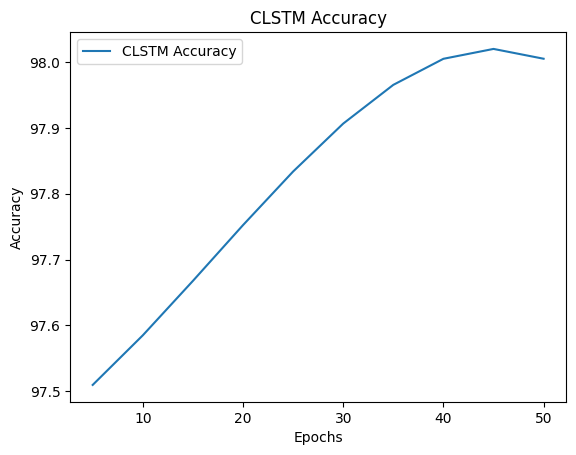

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Example data
x_values = np.array([5, 10, 15, 20, 25, 30, 35, 40, 45, 50])
y_values = np.array([97.35, 97.70, 97.83, 98.34, 96.71, 98.02, 98.24, 98.02, 98.18, 97.86])

# Fit a polynomial curve (you can choose the degree)
degree = 3
coefficients = np.polyfit(x_values, y_values, degree)
poly_function = np.poly1d(coefficients)

# Generate y values for the fitted curve
y_curve = poly_function(x_values)

# Plotting the original data points
# plt.plot(x_values, y_values, 'o', label='Data Points')

# Plotting the fitted curve
plt.plot(x_values, y_curve, label='CLSTM Accuracy')

# Adding labels and title
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('CLSTM Accuracy')

# Adding a legend
plt.legend()

# Display the plot
plt.show()


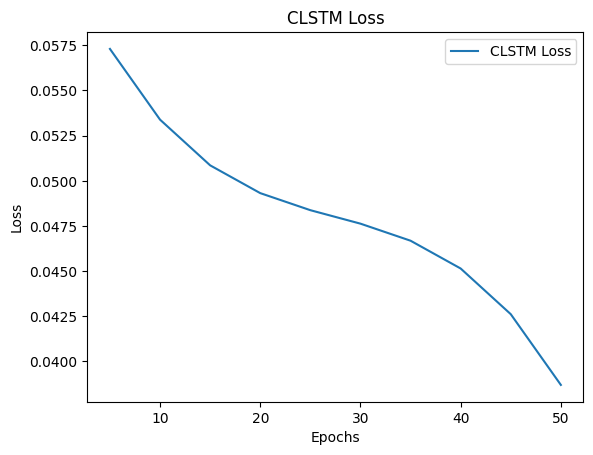

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Example data
x_values = np.array([5, 10, 15, 20, 25, 30, 35, 40, 45, 50])
y_values = np.array([0.06, 0.05, 0.05, 0.04, 0.07, 0.04, 0.04, 0.05, 0.04, 0.04])

# Fit a polynomial curve (you can choose the degree)
degree = 3
coefficients = np.polyfit(x_values, y_values, degree)
poly_function = np.poly1d(coefficients)

# Generate y values for the fitted curve
y_curve = poly_function(x_values)

# Plotting the original data points
# plt.plot(x_values, y_values, 'o', label='Data Points')

# Plotting the fitted curve
plt.plot(x_values, y_curve, label='CLSTM Loss')

# Adding labels and title
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('CLSTM Loss')

# Adding a legend
plt.legend()

# Display the plot
plt.show()
